# Kaggle - Digit Recognizer
## Learn computer vision fundamentals with the famous MNIST data

https://www.kaggle.com/c/digit-recognizer

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# read data
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# split data in train and test
n = int(data.shape[0] * 80 / 100);
train_data = data.iloc[0:n,:]
test_data = data.iloc[n:,:]

train_data.shape, test_data.shape

((33600, 785), (8400, 785))

In [4]:
Y_train = tf.constant(train_data.iloc[:,0])
X_train = tf.constant(train_data.iloc[:,1:] / 255.0)
X_train = tf.reshape(X_train, (X_train.shape[0], 28, 28, 1))


X_train.shape,Y_train.shape

(TensorShape([33600, 28, 28, 1]), TensorShape([33600]))

In [5]:
Y_test = tf.constant(test_data.iloc[:,0])
X_test = tf.constant(test_data.iloc[:,1:] / 255.0)
X_test = tf.reshape(X_test, (X_test.shape[0], 28, 28, 1))


X_test.shape,Y_test.shape

(TensorShape([8400, 28, 28, 1]), TensorShape([8400]))

In [6]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [7]:
def show_sample(X, Y, index):
	image = X[index]
	if len(Y) > index:
		n = tf.argmax(Y[index])
		print("Number: " + str(n.numpy()))
	else:
		print("Number: ???")
	plt.imshow(image)

Number: 4


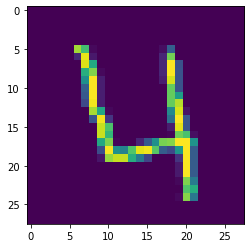

In [8]:
show_sample(X_train, Y_train, 3)


Number: 6


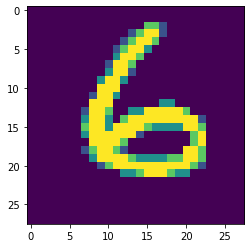

In [9]:
show_sample(X_test, Y_test, 70)

## Create the model

In [10]:
def create_model():
    
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.BatchNormalization()) 
    model.add(keras.layers.AveragePooling2D())
    model.add(keras.layers.Dropout(0.2)) 

    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(keras.layers.BatchNormalization()) 
    model.add(keras.layers.AveragePooling2D())
    model.add(keras.layers.Dropout(0.4)) 
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dense(units=32, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation = 'softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 16)        64        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 32)          0

## Train the model

In [12]:
def train (model, epochs, batch_size, X, Y):
    history = model.fit(
        X,
        Y,
        epochs = epochs,
        batch_size = batch_size,
        verbose = 1, 
        validation_split = 0.2
        )    
    return history

In [13]:
history = train(model, 30, 128, X_train, Y_train)

Epoch 1/30
210/210 [==============================] - 10s 45ms/step - loss: 0.4316 - accuracy: 0.8648 - val_loss: 1.4656 - val_accuracy: 0.4060
Epoch 2/30
210/210 [==============================] - 9s 44ms/step - loss: 0.1171 - accuracy: 0.9634 - val_loss: 0.2769 - val_accuracy: 0.9374
Epoch 3/30
210/210 [==============================] - 9s 44ms/step - loss: 0.0867 - accuracy: 0.9718 - val_loss: 0.0672 - val_accuracy: 0.9805
Epoch 4/30
210/210 [==============================] - 9s 44ms/step - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 5/30
210/210 [==============================] - 10s 46ms/step - loss: 0.0656 - accuracy: 0.9784 - val_loss: 0.0403 - val_accuracy: 0.9879
Epoch 6/30
210/210 [==============================] - 10s 46ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0435 - val_accuracy: 0.9876
Epoch 7/30
210/210 [==============================] - 9s 45ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0377 - val_accuracy: 0.9

## create history dataframe

In [14]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.021650,0.992597,0.027941,0.991815,25
26,0.019969,0.993080,0.038526,0.988839,26
27,0.021111,0.992783,0.038225,0.989732,27
28,0.018153,0.993304,0.028408,0.992262,28
29,0.019117,0.993266,0.030969,0.990923,29


## Plot

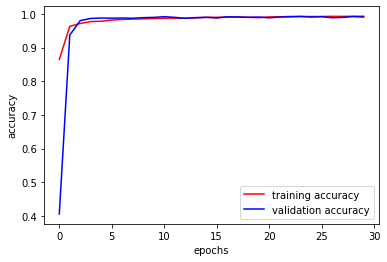

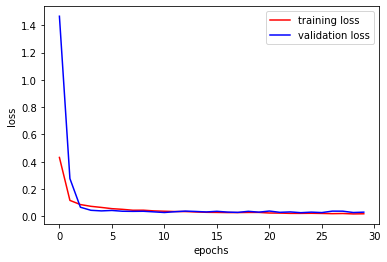

In [15]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## evaluate the model on test data

In [16]:
print(model.evaluate(X_test,Y_test))

263/263 [==============================] - 1s 4ms/step - loss: 0.0302 - accuracy: 0.9911
[0.03019285574555397, 0.9910714030265808]


## Make a prediction

In [17]:
prediction = model.predict(X_test)
print("Actual digits:   ", np.argmax(Y_test[0:10], axis = 1))
print("Predicted digits:", np.argmax(prediction[0:10], axis = 1))

Actual digits:    [0 7 7 2 2 6 5 7 8 5]
Predicted digits: [0 7 7 2 2 6 5 7 8 5]


Actual image of digits:


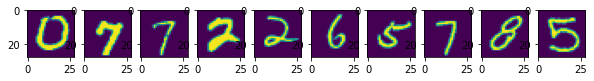

In [18]:
print("Actual image of digits:")
fig, a = plt.subplots(1, 10, figsize=(10, 2))
for i in range(10):
  a[i].imshow(np.reshape(X_test[i], (28,28)))

## Predict Kaggle Competition data

In [19]:
# read data
data = pd.read_csv('data/test.csv')
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_Comp = tf.constant(data / 255.0)
X_Comp = tf.reshape(X_Comp, (X_Comp.shape[0], 28, 28, 1))


X_Comp.shape

TensorShape([28000, 28, 28, 1])

In [21]:
prediction = model.predict(X_Comp)

In [22]:
print("Predicted digits:", np.argmax(prediction[0:20], axis = 1))

Predicted digits: [2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0]


Actual image of digits:


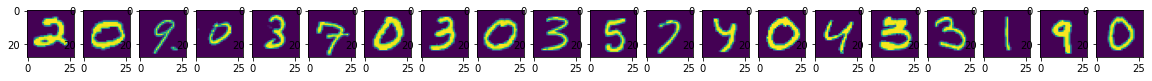

In [23]:
print("Actual image of digits:")
fig, a = plt.subplots(1, 20, figsize=(20, 2))
for i in range(20):
  a[i].imshow(np.reshape(X_Comp[i], (28,28)))

## Create the submission file

In [24]:
Y_Comp = np.argmax(prediction, axis = 1)

idxs = []
for i in list(data.index):
    idxs.append(i+1)

submission_df = pd.DataFrame({
    "ImageId": idxs,
    "Label": Y_Comp
})

In [25]:
submission_df.to_csv("data/submission.csv", index = False)